In [521]:
import scipy.io as spio
import numpy as np
import pandas as pd

In [522]:
data = spio.loadmat('hw3data (1).mat')
#data

In [523]:
type(data)

dict

In [524]:
temp_x = data["data"]
temp_x.shape

(4096, 3)

In [525]:
y = data["labels"]
y.shape

(4096, 1)

In [526]:
x = np.insert(temp_x, 0, 1, axis=1)
x.shape

(4096, 4)

In [527]:
x

array([[  1.        ,  13.78870202,   0.81472369,  16.40247248],
       [  1.        ,   1.00910006,   0.90579194,   6.84179316],
       [  1.        ,   3.68868231,   0.12698682,  17.44004291],
       ..., 
       [  1.        ,   2.9251931 ,   0.70619143,  15.00293142],
       [  1.        ,   6.3353976 ,   0.5352059 ,   0.39154996],
       [  1.        ,   5.62450812,   0.19321104,  15.10334281]])

###  Question 3.b)

In [528]:
def LossFunc(x,y,b):
    loss = np.log(1+np.exp(np.dot(x,b))) - np.multiply(y,np.dot(x,b))
    return np.mean(loss)


In [529]:
def grad(x,y,b):
    temp = 1/(1+np.exp(-1*(np.dot(x,b)))) - y
    deriv = np.multiply(temp, x)
    return np.mean(deriv, axis=0).reshape((4,1))

In [530]:
def backtrack_ls(loss,x,y,b):
   
    gradient = grad(x,y,b)
    gradient2= np.dot(gradient.T,gradient)
    #initial step size
    a=1
    while(LossFunc(x,y,b-a*gradient) > loss - 0.5*a*gradient2):
        a = a/2
        
    return a

In [531]:
b = np.zeros((4,1))
#b

In [532]:

loss = LossFunc(x,y,b)
#iniialize
alpha = 1
count = 0
while loss>=0.65064:

    alpha = backtrack_ls(loss,x,y,b)
    count = count + 1
    b = b - alpha*grad(x,y,b)
    loss = LossFunc(x,y,b)
 
    


In [533]:
print("Number of iterations needed:")
count

Number of iterations needed:


4658

### Question 3.c)

In [534]:
features = pd.DataFrame(x)
#features

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

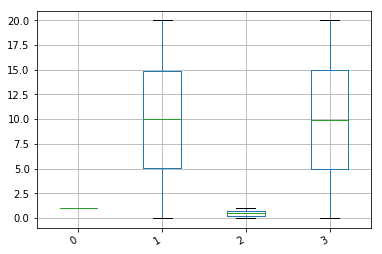

In [535]:
%matplotlib inline
import matplotlib.pyplot as plt
features.boxplot()
plt.xticks( rotation=30, ha="right")

In [536]:
features.describe()

,0,1,2,3
count,4096.0,4096.000000,4096.000000,4096.000000
mean,1.0,9.920418,0.505989,9.926479
std,0.0,5.745950,0.286350,5.793278
min,1.0,0.001780,0.000341,0.001405
25%,1.0,5.020690,0.256358,4.918141
50%,1.0,9.992839,0.510126,9.895873
75%,1.0,14.892801,0.751045,14.937338
max,1.0,19.993388,0.999793,19.988979


In [537]:
transformed_x = x
transformed_x[:,1] = (transformed_x[:,1])/np.std(x[:,1])
transformed_x[:,2] = (transformed_x[:,2])/np.std(x[:,2])
transformed_x[:,3] = (transformed_x[:,3])/np.std(x[:,3])

In [538]:
f = pd.DataFrame(transformed_x)

(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

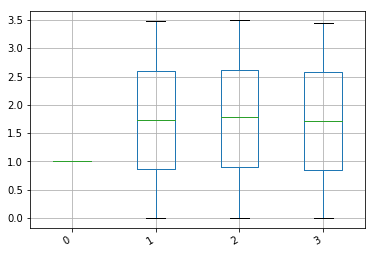

In [539]:
%matplotlib inline
import matplotlib.pyplot as plt
f.boxplot()
plt.xticks( rotation=30, ha="right")

In [540]:
b.fill(0)

In [541]:

loss = LossFunc(transformed_x,y,b)
#initialize
alpha = 1
count = 0

while loss>=0.65064:
    
    alpha = backtrack_ls(loss,transformed_x,y,b)
    count = count + 1
    b = b - alpha*grad(transformed_x,y,b)
    loss = LossFunc(transformed_x,y,b)


In [542]:
count

214

### Question 3.d)

In [543]:
temp_x = data["data"]
x = np.insert(temp_x, 0, 1, axis=1)
x

array([[  1.        ,  13.78870202,   0.81472369,  16.40247248],
       [  1.        ,   1.00910006,   0.90579194,   6.84179316],
       [  1.        ,   3.68868231,   0.12698682,  17.44004291],
       ..., 
       [  1.        ,   2.9251931 ,   0.70619143,  15.00293142],
       [  1.        ,   6.3353976 ,   0.5352059 ,   0.39154996],
       [  1.        ,   5.62450812,   0.19321104,  15.10334281]])

In [544]:
x_train = x[:int(0.8*4096), :]
x_val = x[int(0.8*4096):, :]

y_train = y[:int(0.8*4096), :]
y_val = y[int(0.8*4096):, :]

In [545]:
transformed_x_train = transformed_x[:int(0.8*4096), :]
transformed_x_val = transformed_x[int(0.8*4096):, :]

### Modified gradient Descent on the original dataset

In [546]:
b.fill(0)

In [547]:
def power_2(n):
     n = n/2
    if n == 2:
        return True
    elif n > 2:
        return is_power(n)
    else:
        return False
power_2(17)

False

In [548]:
step = 1
count = 0
loss = LossFunc(x_train,y_train,b)
valid_loss = LossFunc(x_val,y_val,b)
best = 100

while True:

    step = backtrack_ls(loss,x_train,y_train, b)
    count += 1
    
    b = b - step*grad(x_train,y_train,b)
    
    loss = LossFunc(x_train, y_train,b)     
                    
    if power_2(count):
        m = np.dot(x_val,b)>=0
        n = [int(i) for i in m]
        e= [1 if y_val[i,0]!=n[i] else 0 for i in range(len(n)) ]
        err = sum(e)/len(e)

        print(err)

        if err>0.99*best and count >=32:
            obj = LossFunc(x_train,y_train,b)
            break

        best= min(best, err)
   

0.5292682926829269
0.525609756097561
0.4975609756097561
0.49878048780487805
0.5048780487804878
0.4658536585365854
0.4073170731707317
0.3926829268292683
0.37926829268292683
0.3829268292682927


In [549]:
count

512

In [550]:
loss

0.65506962345974018

In [551]:
error

0.3829268292682927

### Modified gradient Descent on the linearly tranformed data

In [552]:
b.fill(0)

In [553]:
step = 1
count = 0
loss = LossFunc(transformed_x_train,y_train,b)
valid_loss = LossFunc(transformed_x_val,y_val,b)
best = 100

while True:
  
   step = backtrack_ls(loss,transformed_x_train,y_train, b)
    count += 1
    
    b = b - step*grad(transformed_x_train,y_train,b)
    
    loss = LossFunc(transformed_x_train, y_train,b)     
                    
    if power_2(count):
        m = np.dot(transformed_x_val,b)>=0
        n = [int(i) for i in m]

        e= [1 if y_val[i,0]!=n[i] else 0 for i in range(len(n)) ]
        err = sum(e)/len(e)

        print(err)

        if err>0.99*best and count >=32:
            obj = LossFunc(transformed_x_train,y_train,b)
            break

        best= min(best, err)

0.48048780487804876
0.38658536585365855
0.3853658536585366
0.38414634146341464
0.38414634146341464
0.375609756097561
0.3878048780487805


In [554]:
count

64

In [555]:
loss

0.65116057638827773

In [556]:
error

0.3878048780487805